Iris Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df=pd.read_csv("/content/Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Splitting of X,Y

In [ ]:
x= df.iloc[:, 1:-1]
y=df['Species']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train2 = model.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("Random Forest Classifier: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train2)))

Random Forest Classifier: 
Test Accuracy:  0.9666666666666667
Train Accuracy:  1.0


Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Decision Tree Classifier: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Decision Tree Classifier: 
Test Accuracy:  0.9333333333333333
Train Accuracy:  1.0


Feature Importance

In [ ]:
ff=df.columns[1:-1]
ff

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=df.columns[1:-1]).sort_values(ascending=False)
feature_imp

PetalWidthCm     0.924299
PetalLengthCm    0.056904
SepalWidthCm     0.018797
SepalLengthCm    0.000000
dtype: float64

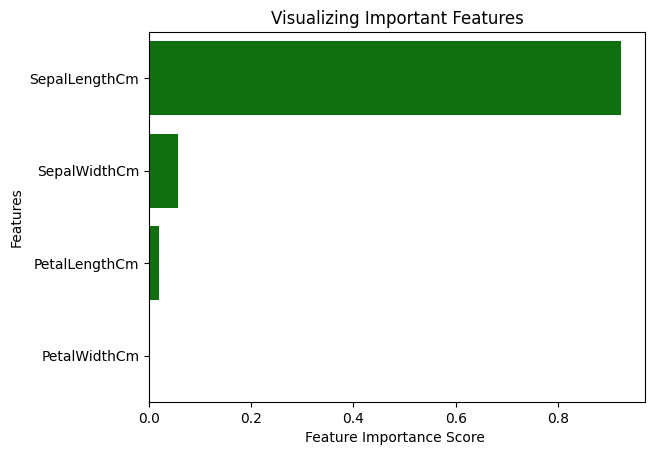

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=ff, color='green')
plt.xlabel('Feature Importance Score ')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [ ]:
x=df[["SepalWidthCm","PetalLengthCm","PetalWidthCm"]]
y=df['Species']
x

,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,3.5,1.4,0.2
1,3.0,1.4,0.2
2,3.2,1.3,0.2
3,3.1,1.5,0.2
4,3.6,1.4,0.2
...,...,...,...
145,3.0,5.2,2.3
146,2.5,5.0,1.9
147,3.0,5.2,2.0
148,3.4,5.4,2.3


Decision Tree with Feature importance

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Decision Tree Classifier with Feature selection: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Decision Tree Classifier with Feature selection: 
Test Accuracy:  0.9333333333333333
Train Accuracy:  1.0


Random Forest with Feature importance

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [ ]:
print("Random Forest Classifier with Feature selection: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train)))

Random Forest Classifier with Feature selection: 
Test Accuracy:  0.9666666666666667
Train Accuracy:  1.0


In [ ]:
rf = RandomForestClassifier(bootstrap = True , class_weight = None, criterion = 'gini',
                            max_depth= None , max_features = 'auto' , max_leaf_nodes = None,
                            min_impurity_decrease= 0.0,
                            min_samples_leaf = 1 , min_samples_split = 2 ,
                            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                            oob_score=False, random_state = None , verbose = 0 ,
                            warm_start = False)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Random Forest with Parameters

In [ ]:
print("Random Forest Classifier with Parameters: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train)))

Random Forest Classifier with Parameters: 
Test Accuracy:  0.9666666666666667
Train Accuracy:  1.0


Breast Cancer Dataset

In [ ]:
df1=pd.read_csv("/content/Breast_cancer_data (1).csv")
df1.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Splitting of x and y

In [ ]:
x1=df1.iloc[:,:-1]
y1=df1.iloc[:,-1]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=2)

Decision Tree Classifier

In [ ]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Decision Tree Classifier: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Decision Tree Classifier: 
Test Accuracy:  0.9035087719298246
Train Accuracy:  1.0


Random Forest Classifier

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train2 = model.predict(x_train)

In [ ]:
print("Random Tree Classifier: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train2)))

Random Tree Classifier: 
Test Accuracy:  0.9035087719298246
Train Accuracy:  1.0


Feature Importance

In [ ]:
ff1=df1.columns[0:-1]
ff1

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness'],
      dtype='object')

In [ ]:
feature_imp = pd.Series(model.feature_importances_,index=df1.columns[0:-1]).sort_values(ascending=False)
feature_imp

mean_perimeter     0.319725
mean_area          0.274438
mean_radius        0.188865
mean_texture       0.111747
mean_smoothness    0.105224
dtype: float64

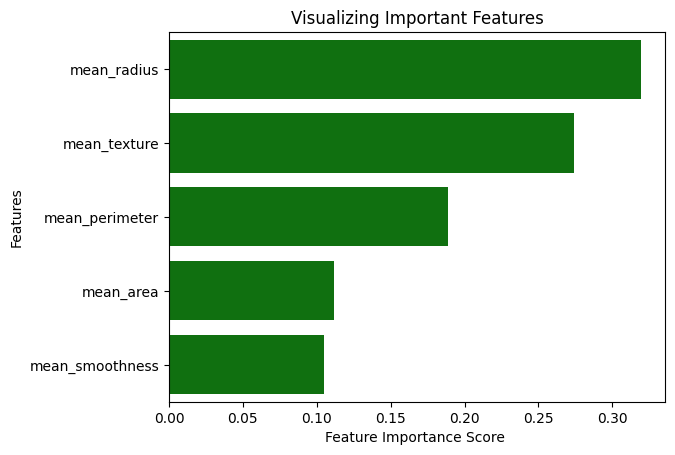

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.barplot(x=feature_imp, y=ff1, color='green')
plt.xlabel('Feature Importance Score ')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.show()

In [ ]:
x1=df1[["mean_radius","mean_texture","mean_perimeter"]]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=2)

Decision Tree with Feature Importance

In [ ]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Decision Tree Classifier with Feature selection: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Decision Tree Classifier with Feature selection: 
Test Accuracy:  0.8859649122807017
Train Accuracy:  1.0


Random Forest with Feature Importance

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [ ]:
print("Random Forest Classifier with Feature selection: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train)))

Random Forest Classifier with Feature selection: 
Test Accuracy:  0.8947368421052632
Train Accuracy:  1.0


Nishant Golakiya- 60009220150 D2-1

From Scratch

Decision Tree

In [ ]:
def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])


class Node:
    def __init__(
        self, feature=None, threshold=None, left=None, right=None, *, value=None
    ):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_feats=None):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.root = None

    def fit(self, X, y):
        self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
        self.root = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))
        if (
            depth >= self.max_depth
            or n_labels == 1
            or n_samples < self.min_samples_split
        ):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, self.n_feats, replace=False)
        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold

        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = entropy(y)
        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

    def _most_common_label(self, y):
        counter = Counter(y)
        most_common = counter.most_common(1)[0][0]
        return most_common


Random Forest

In [ ]:
def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTree(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)

Checking accuracy of Random Forest model from scratch on Iris Dataset

In [ ]:
from sklearn import datasets

In [ ]:
data = datasets.load_iris()
X = data.data
y = data.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
clf = RandomForest(n_trees=3, max_depth=10)
clf.fit(x_train, y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Random Forest Classifier from Scratch: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Random Forest Classifier from Scratch: 
Test Accuracy:  0.9666666666666667
Train Accuracy:  0.9833333333333333


Behavioural Risk Factor Survillance System Dataset

In [ ]:
df3=pd.read_csv("/content/2011.csv")
df3.head()

,_STATE,_GEOSTR,_DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,IDATE,IMONTH,IDAY,...,DRNKANY5,DROCDY3_,_RFBING5,_DRNKDY4,_DRNKMO4,_RFDRHV4,_RFDRMN4,_RFDRWM4,_AIDTST3,HAVHPAD
0,1.0,1.0,1.0,1.0,10001.0,27.0,1.0,b'01202011',b'01',b'20',...,1.0,4.300000e+01,1.0,8.600000e+01,2.600000e+01,1.0,NaN,1.0,2.0,NaN
1,1.0,1.0,1.0,1.0,10008.0,13.0,1.0,b'01142011',b'01',b'14',...,9.0,9.000000e+02,9.0,9.900000e+03,9.999000e+03,9.0,9.0,NaN,NaN,NaN
2,1.0,5.0,1.0,1.0,10058.0,4.0,1.0,b'01062011',b'01',b'06',...,1.0,1.400000e+01,1.0,1.400000e+01,4.000000e+00,1.0,NaN,1.0,2.0,NaN
3,1.0,7.0,1.0,1.0,10079.0,7.0,1.0,b'02012011',b'02',b'01',...,9.0,9.000000e+02,9.0,9.900000e+03,9.999000e+03,9.0,NaN,9.0,NaN,NaN
4,1.0,7.0,1.0,1.0,10081.0,28.0,1.0,b'02012011',b'02',b'01',...,2.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.0,NaN,1.0,1.0,NaN


In [ ]:
df3.isna().sum().unique()

array([    0,  3961,  3960, 16745, 21828,  5293,  5294, 32208,   901,
       20283, 31261, 26120, 36382,     5,     1,     3,   992, 35071,
       29472, 12108, 11601,    14, 30970,   608,   659,   715,   765,
         798,   836,   931, 10816, 10962, 10982, 10996, 20512, 20521,
        1053,  1118,  1130, 24992, 25002, 25011, 25024,  1186,  1235,
       22659, 22671,  1264,  1285, 20508, 20511, 20516,  1381, 26250,
        5098, 28348, 36291, 36305, 37085, 36314, 36315, 36709, 36747,
       36513, 36756, 33871, 33870, 33872, 33874, 36656, 36824, 31208,
       33330, 31220, 31221, 31222, 31223, 31225, 31230, 31231, 31232,
       31234, 31235, 31251, 36920, 36664, 36478, 36480, 36141, 36772,
       36563, 35714, 37043, 35717, 35718, 36911, 35743, 36492, 30998,
       29245, 33125, 36726, 29263, 29291, 29257, 35712, 19364,  1123,
         374,  1056,   508,   419,  1117,  1601,  2224,  2035,  2249,
        2127,  2264,  2370,  1699,  1807, 10918, 11316, 11049, 11445,
       11352, 20734,

In [ ]:
df3.duplicated().unique()

array([False])

In [ ]:
df3.describe()

,_STATE,_GEOSTR,_DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,DISPCODE,SEQNO,_PSU,...,DRNKANY5,DROCDY3_,_RFBING5,_DRNKDY4,_DRNKMO4,_RFDRHV4,_RFDRMN4,_RFDRWM4,_AIDTST3,HAVHPAD
count,37085.000000,37085.000000,37085.000000,37085.000000,37085.000000,37085.000000,37085.000000,37085.000000,3.708500e+04,3.708500e+04,...,37084.000000,3.707800e+04,37084.000000,3.707800e+04,3.708400e+04,37084.000000,14465.000000,22619.000000,35703.000000,0.0
mean,4.103438,14.209141,2.108157,1.024997,60554.472698,15.444385,6.004314,110.982877,2.011005e+09,2.011005e+09,...,2.114605,8.903245e+01,1.803231,9.045521e+02,8.899055e+02,1.757038,1.777947,1.743667,2.186623,NaN
std,1.985651,29.537087,2.420760,0.272406,34326.420558,8.681247,3.439091,2.977073,4.554000e+03,4.554000e+03,...,2.074944,2.438453e+02,2.238998,2.792941e+03,2.828670e+03,2.260190,2.277408,2.249058,1.923510,NaN
min,1.000000,1.000000,1.000000,1.000000,10001.000000,1.000000,1.000000,110.000000,2.011000e+09,2.011000e+09,...,1.000000,5.397605e-79,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,1.000000,NaN
25%,2.000000,2.000000,1.000000,1.000000,30298.000000,8.000000,3.000000,110.000000,2.011002e+09,2.011002e+09,...,1.000000,5.397605e-79,1.000000,5.397605e-79,5.397605e-79,1.000000,1.000000,1.000000,1.000000,NaN
50%,5.000000,3.000000,1.000000,1.000000,60060.000000,15.000000,6.000000,110.000000,2.011004e+09,2.011004e+09,...,2.000000,3.000000e+00,1.000000,3.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,2.000000,NaN
75%,6.000000,8.000000,2.000000,1.000000,90218.000000,23.000000,9.000000,110.000000,2.011007e+09,2.011007e+09,...,2.000000,2.900000e+01,1.000000,6.000000e+01,1.800000e+01,1.000000,1.000000,1.000000,2.000000,NaN
max,6.000000,99.000000,9.000000,5.000000,120456.000000,30.000000,12.000000,120.000000,2.011018e+09,2.011018e+09,...,9.000000,9.000000e+02,9.000000,9.900000e+03,9.999000e+03,9.000000,9.000000,9.000000,9.000000,NaN


In [ ]:
df3.dropna(subset=['HIVRISK3'],inplace=True)

In [ ]:
df3['HIVRISK3'].isnull().sum()

0

In [ ]:
na_percent = df3.isnull().sum()/df3.shape[0]*100
col_to_drop = na_percent[na_percent>50].keys()
print(col_to_drop)
df3.drop(col_to_drop,axis = 1,inplace = True)

Index(['BPMEDS', 'ASTHNOW', 'SMOKDAY2', 'STOPSMK2', 'LASTSMK2', 'ORACE2',
       'NUMPHON2', 'CPDEMO2', 'PREGNANT', 'EXEROFT2',
       ...
       '_CLCPM03', '_CLCPM04', '_CLCPM05', '_CLLCPWT', 'PADUR2_', 'PAFREQ2_',
       '_FLSHOT5', '_PNEUMO2', '_RFDRMN4', 'HAVHPAD'],
      dtype='object', length=250)


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31987 entries, 0 to 37084
Columns: 204 entries, _STATE to _AIDTST3
dtypes: float64(194), object(10)
memory usage: 50.0+ MB


In [ ]:
df3.fillna(df3.mean(), inplace = True)

<ipython-input-195-97aee3992c64>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.fillna(df3.mean(), inplace = True)


In [ ]:
df21=df3.select_dtypes(include=['object'])
df21.head(2)

,IDATE,IMONTH,IDAY,IYEAR,INTVID,MRACE,RCSBIRTH,RCSRACE,RCVFVCH4,MRACEORG
0,b'01202011',b'01',b'20',b'2011',b'00118',b'18',b'',b'',b'',b'1'
2,b'01062011',b'01',b'06',b'2011',b'00140',b'18',b'',b'',b'',b'1'


In [ ]:
col_to_drop=df21.columns
col_to_drop

Index(['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'INTVID', 'MRACE', 'RCSBIRTH',
       'RCSRACE', 'RCVFVCH4', 'MRACEORG'],
      dtype='object')

In [ ]:
df3.drop(col_to_drop,axis = 1,inplace = True)

In [ ]:
df3.head()

,_STATE,_GEOSTR,_DENSTR2,PRECALL,REPNUM,REPDEPTH,FMONTH,DISPCODE,SEQNO,_PSU,...,_RFSEAT2,_RFSEAT3,DRNKANY5,DROCDY3_,_RFBING5,_DRNKDY4,_DRNKMO4,_RFDRHV4,_RFDRWM4,_AIDTST3
0,1.0,1.0,1.0,1.0,10001.0,27.0,1.0,120.0,2.011000e+09,2.011000e+09,...,1.0,1.0,1.0,4.300000e+01,1.0,8.600000e+01,2.600000e+01,1.0,1.000000,2.0
2,1.0,5.0,1.0,1.0,10058.0,4.0,1.0,120.0,2.011001e+09,2.011001e+09,...,1.0,1.0,1.0,1.400000e+01,1.0,1.400000e+01,4.000000e+00,1.0,1.000000,2.0
4,1.0,7.0,1.0,1.0,10081.0,28.0,1.0,120.0,2.011001e+09,2.011001e+09,...,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.0,1.000000,1.0
5,1.0,7.0,1.0,1.0,10082.0,3.0,1.0,120.0,2.011001e+09,2.011001e+09,...,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.0,1.521216,1.0
7,1.0,10.0,2.0,1.0,10126.0,12.0,1.0,120.0,2.011001e+09,2.011001e+09,...,1.0,1.0,2.0,5.397605e-79,1.0,5.397605e-79,5.397605e-79,1.0,1.521216,1.0


In [ ]:
final_col = df3.columns
len(final_col)

194

In [ ]:
x3 = df3.drop('HIVRISK3',axis = 1)
y3 = df3['HIVRISK3']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x3, y3, test_size=0.2, random_state=2)

Decision Tree Classifier

In [ ]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Decision Tree Classifier: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Decision Tree Classifier: 
Test Accuracy:  0.9448265082838387
Train Accuracy:  1.0


Random Forest Classifer

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train2 = model.predict(x_train)

In [ ]:
print("Random Tree Classifier: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train2)))

Random Tree Classifier: 
Test Accuracy:  0.9726477024070022
Train Accuracy:  1.0


Feature Importance

In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=list(final_col[0:-1])).sort_values(ascending=False)
feature_imp

HIVTST6     0.590732
DISPCODE    0.016277
REPNUM      0.013074
_LLCPM12    0.011447
_RAWRAKE    0.010918
              ...   
_FRTRESP    0.000000
_MISVEGN    0.000000
VEGEDA1_    0.000000
_LLCPM04    0.000000
_STATE      0.000000
Length: 193, dtype: float64

In [ ]:
selected_features = feature_imp[feature_imp>0.01].keys()
selected_features

Index(['HIVTST6', 'DISPCODE', 'REPNUM', '_LLCPM12', '_RAWRAKE'], dtype='object')

In [ ]:
xf3 = df3[selected_features]
yf3 = df3['HIVRISK3']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xf3, yf3, test_size=0.2, random_state=2)

Decision Tree with Feature Selection

In [ ]:
clf=DecisionTreeClassifier(random_state=2)
clf.fit(x_train,y_train)
y_pred1=clf.predict(x_test)
y_pred_train1 = clf.predict(x_train)

In [ ]:
print("Decision Tree Classifier with Feature selection: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred1)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train1)))

Decision Tree Classifier with Feature selection: 
Test Accuracy:  0.945451703657393
Train Accuracy:  0.9944898198444644


Random Forest with Feature Selection

In [ ]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [ ]:
print("Random Forest Classifier with Feature selection: ")
print("Test Accuracy: ",accuracy_score(list(y_test),list(y_pred)))
print("Train Accuracy: ",accuracy_score(list(y_train),list(y_pred_train)))

Random Forest Classifier with Feature selection: 
Test Accuracy:  0.9562363238512035
Train Accuracy:  0.9944507405525812
